In [1]:
from math import exp,cos,sin
from math import *
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

### INTRODUCTION

L'idée de base est de construire une suite $ y_{i} $ donnant une approximation de la solution de 
$$ \frac{dy}{dx}=f(x,y)   $$
en fonction de $x_{i}$ pour $ i\in \mathbb{N} $. Cette suite est définie par:
$$ y_{i+1} = y_i + M(x_i, y_i, h)\,,\qquad h=x_{i+1}-x_i \,,
$$
pour une certaine fonction $ M $ appelée méthode.


*  Pour la méthode d'*`Euler explicite`*, la fonction $ M $ est donnée par:
	$$ M(x, y, h) = h f(x,y)\,.
	$$
* Une méthode de *`Runge-Kutta`* d'ordre *`deux`* est donnée par:
	$$  M(x,y, h) = h f\bigg(x+\frac{h}{2},~ y + \frac{h}{2} f(x,y) \bigg) \,.
	$$
* Une méthode de *`Runge-Kutta`* d'ordre *`quatre`* est donnée par:
	$$ M(x,y, h) = \frac{h}{6} \Big(\boldsymbol{k}_1 + 2\boldsymbol{k}_2 + 2\boldsymbol{k}_3 + \boldsymbol{k}_4\Big) \,,
	$$
	où
	\begin{align*}
		\boldsymbol{k}_{1} & =f(x,y)\,,\\
		\boldsymbol{k}_{2} &
		=f\bigg(x+\frac{h}{2},y+\frac{h}{2}\boldsymbol{k}_{1}\bigg)\,,\\
		\boldsymbol{k}_{3} & =f\bigg(x+\frac{h}{2},y+\frac{h}{2}\boldsymbol{k}_{2}\bigg)\,,\\ 
		\boldsymbol{k}_{4} & =f(x+h,y+h\boldsymbol{k}_{3})\,. 
	\end{align*}
* À noter que plus généralement, une méthode de *`Runge-Kutta`* d'ordre $ `s` $ est donnée par:
	$$ M(x,y,h) = h \sum_{i=1}^s b_i \boldsymbol{k}_i \,,
	$$
	où
	\begin{align*} 
		\boldsymbol{k}_{1} & =f(x,y)\,,\\
		\boldsymbol{k}_{2} & =f(x+c_{2}h,y+ha_{21}\boldsymbol{k}_{1})\,,\\ \boldsymbol{k}_{3} & =f\Big(x+c_{3}h,y+h(a_{31}\boldsymbol{k}_{1}+a_{32}\boldsymbol{k}_{2})\Big)\,,\\
		& \vdots\\
		\boldsymbol{k}_{s} & =f\Big(x+c_{s}h,y+h(a_{s1}\boldsymbol{k}_{1}+a_{s2}\boldsymbol{k}_{2}+\cdots+a_{s,s-1}\boldsymbol{k}_{s-1})\Big)\,. 
	\end{align*}
	Les coefficients $a_{ij}$ (pour $ 1\leq j\leq i\leq s) $, $ c_i $ (pour $ 2\leq i\leq s $), et $ b_i $ (pour $ 1\leq i\leq s $), sont souvent représentés dans un tableau de Butcher:
	$$ \begin{array}{c|ccccc}
		0\\ c_{2} & a_{21}\\ c_{3} & a_{31} & a_{32}\\ \vdots & \vdots & & \ddots\\ c_{s} & a_{s1} & a_{s2} & \cdots & a_{s,s-1}\\ \hline & b_{1} & b_{2} & \cdots & b_{s-1} & b_{s} 
	\end{array}
	$$	  
	Par exemple, le tableau de Butcher de la méthode précédente d'ordre deux est:
	$$ 
	\begin{array}{c|cc} 
		0\\ \frac{1}{2} & \frac{1}{2}\\ \hline & 0 & 1 
	\end{array}
	$$
	et celui de la méthode d'ordre quatre:
	$$ \begin{array}{c|cccc} 
		0\\ \frac{1}{2} & \frac{1}{2}\\ \frac{1}{2} & 0 & \frac{1}{2}\\ 1 & 0 & 0 & 1\\ \hline & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6} 
	\end{array}
	$$


### MÉTHODE D'EULER

#### EXERCICE I:
<b>Objectif</b> : programmer la méthode d'Euler pour résoudre l'équation différentielle 
	$$(E):\qquad\qquad y' - y =1\quad \text{avec}\quad y(0) = 0\,,\quad\text{sur l'intervalle}~ [0;~4]\,.$$
	

<b>Q1.</b> Créer une fonction `f` qui prend en arguments les valeurs de $x$ et $y$ et qui nous retournera la valeur $y+1$:

In [2]:
def f(x, y):
    return y + 1

<b>Q2.</b> Écrire une fonction `euler` qui prend en arguments la fonction ` f`  les valeurs initiales $ x_0 $ et $y_0=y(x_0)$, le pas $ h $ et la valeur maximale $ x_{\rm max} $. La fonction euler construit la liste  $\rm liste\_x $  des abscisses $ x_{k} $ et la liste $\rm liste\_y $  des ordonn\'ees $ y_{k} $ (valeurs approch\'ees de $y(x_k))$ en utilisant une boucle `while`, puis renvoie ces deux listes.

In [3]:
def euler(f, x0, y0, h, xmax):
    x, y = x0, y0
    list_x, list_y = [], []
    i = 0
    while (x <= xmax):
        list_x.append(x)
        list_y.append(y)
        
        i += 1
        x = h * i
        y += h * f(x, y)
    
    return list_x, list_y

<b> Q3.</b> Tester le programme pour $h = 1$ avec l'instruction ` print(euler(f,x0,y0,h,xmax))`. 

In [4]:
x0, y0 = 0, 0
h = 1
xmax = 4

euler_x, euler_y = euler(f,x0,y0,h,xmax)
print(euler_x, euler_y)

[0, 1, 2, 3, 4] [0, 1, 3, 7, 15]


<b> Q4.</b> La solution exacte de l'equation $(E)$ est connue, $$y_{\rm ex}(x) = e^x-1\,.$$ 
Compléter le programme en créant une nouvelle fonction `erreur` qui prend en arguments le pas $h$ et qui doit calculer l'erreur $$\text{ERREUR}=\max |y_{\rm ex}(x_k) - y(x_k)|$$ puis afficher l'erreur  obtenue. Effectuer des test avec $ h $ prenant les valeurs $1,\, 0.5,\, 0.2,\, 0.1$.

In [5]:
def erreur(h):
    x, y_ = euler(f,x0,y0,h,xmax)
    yk = np.array(y_)
    y = np.exp(x) - 1
    
    return np.max(np.absolute(y - yk))

print(erreur(1), erreur(0.5), erreur(0.2), erreur(0.1))

38.598150033144236 28.969243783144236 16.26055010866949 9.33889446496827


<b>Q5.</b> Tracer sur une même figure les courbes représentatives de la solution exacte $y_{\rm ex}$ et des solutions approchées pour $ h $ prenant les valeurs $1,\, 0.5,\, 0.2,\, 0.1$. sur l'intervalle $ [0,4] $.
Pour tracer les courbes:
* Ajouter un titre au graphique __méthode d'Euler__
* Ajouter une `légende` avec le nom pour chaque courbe.
* Ajouter des `libellés` sur les axes
    * $\text{ plt.xlabel('x - axe des abscisses ')}$ 
    * $\text{ plt.ylabel('y - axe des ordonnées')}$
* Il est possible de préciser la `couleur` et le `style` de chaque courbe (pour la solution exacte on prend le style "--").
* Pour tracer la solution exacte c'est mieux de prendre les valeurs `x=np.linspace(0,4,100)`.
* Afficher le graphe

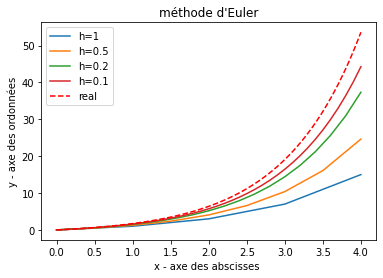

In [6]:
h_list = [1, 0.5, 0.2, 0.1]

plt.title("méthode d'Euler")

plt.xlabel('x - axe des abscisses ')
plt.ylabel('y - axe des ordonnées')

for h in h_list:
    plt.plot(*euler(f,x0,y0,h,xmax), label=f"h={h}")

real_x = np.linspace(x0, xmax, 100)
real_y = np.exp(real_x) - 1

plt.plot(real_x, real_y, 'r--', label="real")
plt.legend()

plt.show()

#### EXERCICE II:

  Reprendre la fonction euler de l'exercice __I__. Programmer la résolution numérique avec la méthode d'Euler de l'équation diff\'erentielle 
	$$(E)\qquad\qquad y' + y =\cos(2x)\quad \text{avec}\quad y(0) = 4\,,\quad\text{sur l'intervalle}~ [0;~12]\,.$$
	Comparer graphiquement les solutions approch\'ees obtenues pour diff\'erentes valeurs du pas 
	$$ h=\{1,\, 0.5\,,0.2\,,0.1 \}$$ avec la solution exacte donnée par : 
    $$y_{\rm ex}(x) = 3.8 e^{-x} + 0.2 \cos(2x) + 0.4 \sin(2x)\,.$$

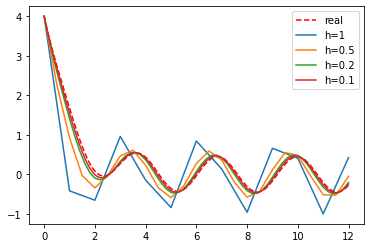

In [7]:
x0, y0 = 0, 4
xmax = 12

def f2(x, y):
    return cos(2 * x) - y

h_list = [1, 0.5, 0.2, 0.1]

real_x = np.linspace(x0, xmax, 100)
real_y = 3.8 * np.exp(-real_x) + 0.2 * np.cos(2 * real_x) + 0.4 * np.sin(2 * real_x)
plt.plot(real_x, real_y, 'r--', label="real")

for h in h_list:
    plt.plot(*euler(f2,x0,y0,h,xmax), label=f"h={h}")

plt.legend()
plt.show()

#### EXERCICE III:

__Objectif__ : résoudre l'équation différentielle
$$(E)\qquad\qquad y' + y =0\quad \text{avec}\quad y(0) = 1\,,\quad\text{sur l'intervalle}~ [0;~30]\,.$$La solution exacte est $ y_{\rm ex}(x) = e^{-x} $.
_(Attention, si le pas n'est pas assez petit, on a un problème de stabilité)_.

__Q1.__ Reprendre la fonction euler de l'exercice __I__. Définir la fonction $f(x,y) = -y$ et tester le programme avec $h = 3$ puis $h = 2.5$ et constater qu'il y a un problème d'instabilité. On construira les courbes des solutions approchées.

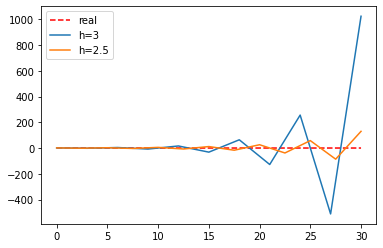

In [31]:
x0, y0 = 0, 1
xmax = 30

def f3(x, y):
    return -y

h_list = [3, 2.5]

real_x = np.linspace(x0, xmax, 100)
real_y = np.exp(-real_x)
plt.plot(real_x, real_y, 'r--', label="real")

for h in h_list:
    plt.plot(*euler(f3,x0,y0,h,xmax), label=f"h={h}")

plt.legend()
plt.show()

__Q2.__ Refaire le test avec $ h = 1.5 $ et construire la courbe.

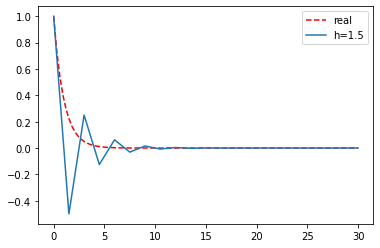

In [32]:
real_x = np.linspace(x0, xmax, 100)
real_y = np.exp(-real_x)
plt.plot(real_x, real_y, 'r--', label="real")

h = 1.5
plt.plot(*euler(f3,x0,y0,h,xmax), label=f"h={h}")

plt.legend()
plt.show()

__Q3.__ Déterminer une valeur approchée de $ h $ à partir de laquelle le schéma sera stable.

In [33]:
from ipywidgets import interact

@interact(h=(0, 4, 0.1))
def plot_with_h(h):
    real_x = np.linspace(x0, xmax, 100)
    real_y = np.exp(-real_x)
    
    plt.plot(real_x, real_y, 'r--', label="real")
    plt.plot(*euler(f3,x0,y0,h,xmax), label=f"h={h}")

    plt.legend()
    plt.show()
    
"La methode d'euler ne semble plus etre stable a partir de h > 1.9"

interactive(children=(FloatSlider(value=2.0, description='h', max=4.0), Output()), _dom_classes=('widget-inter…

"La methode d'euler ne semble plus etre stable a partir de h > 1.9"

__Q4.__ En utilisant une boucle ` while`, compléter le programme qui doit déterminer une valeur approchée de $ h $ à partir de laquelle l'erreur de discrétisation 
$$\text{ERREUR}=\max |y_{\rm ex}(x_k) - y(x_k)|$$
est inf\'erieure à $10^{-1}$.

In [37]:
erreur_autorise = 0.1

def erreur(h):
    x, y_ = euler(f3,x0,y0,h,xmax)
    yk = np.array(y_)
    y = np.exp(-np.array(x))
    
    return np.max(np.absolute(y - yk))

h = 10
while (erreur(h) >= erreur_autorise):
    h /= 2
    print(f"erreur({h}) = {erreur(h)}")
    
h

erreur(5.0) = 4096.0
erreur(2.5) = 129.74633789062491
erreur(1.25) = 0.5365047968601901
erreur(0.625) = 0.16026142851899028
erreur(0.3125) = 0.06665445480179899


0.3125

__Q5.__ Tracer sur une même figure les courbes représentatives de la solution exacte et de la solution approchée pour la valeur trouvé de $ h $, sur l'intervalle $ [0,30] $.

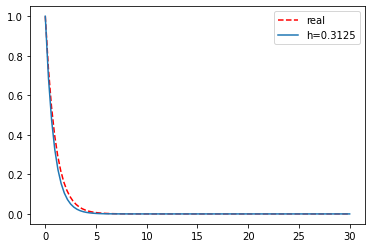

In [38]:
real_x = np.linspace(x0, xmax, 100)
real_y = np.exp(-real_x)
plt.plot(real_x, real_y, 'r--', label="real")

plt.plot(*euler(f3,x0,y0,h,xmax), label=f"h={h}")

plt.legend()
plt.show()